In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("survey_lung_cancer.csv")

In [3]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [4]:
df.tail()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
304,F,56,1,1,1,2,2,2,1,1,2,2,2,2,1,YES
305,M,70,2,1,1,1,1,2,2,2,2,2,2,1,2,YES
306,M,58,2,1,1,1,1,1,2,2,2,2,1,1,2,YES
307,M,67,2,1,2,1,1,2,2,1,2,2,2,1,2,YES
308,M,62,1,1,1,2,1,2,2,2,2,1,1,2,1,YES


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

# Lung Cancer Detection Dataset Feature Descriptions

Each record in the dataset represents a patient and includes the following features, with a total of 309 entries:

- **GENDER**: Categorical. 'F' for female and 'M' for male.
- **AGE**: Numeric. Represents the age of the patient in years.
- **SMOKING**: Binary. '1' may represent non-smoking and '2' for smoking. It's assumed that '2' indicates a higher risk factor.
- **YELLOW_FINGERS**: Binary. '1' might indicate no yellow fingers, and '2' yes, which is often associated with smoking.
- **ANXIETY**: Binary. '1' for no anxiety and '2' for yes.
- **PEER_PRESSURE**: Binary. '1' for no and '2' for yes. Reflects whether peer pressure affects the patient's smoking habits.
- **CHRONIC DISEASE**: Binary. '1' for no chronic disease and '2' for yes.
- **FATIGUE**: Binary. '1' for no and '2' for yes. Indicates whether the patient frequently feels fatigued.
- **ALLERGY**: Binary. '1' for no allergies and '2' for yes.
- **WHEEZING**: Binary. '1' for no wheezing and '2' for yes. Wheezing is a symptom that can be associated with lung conditions.
- **ALCOHOL CONSUMING**: Binary. '1' for no and '2' for yes. Indicates alcohol consumption.
- **COUGHING**: Binary. '1' for no persistent cough and '2' for yes.
- **SHORTNESS OF BREATH**: Binary. '1' for no and '2' for yes. A common symptom in respiratory ailments.
- **SWALLOWING DIFFICULTY**: Binary. '1' for no difficulty swallowing and '2' for yes.
- **CHEST PAIN**: Binary. '1' for no chest pain and '2' for yes. A symptom that might indicate severe underlying conditions.
- **LUNG_CANCER**: Target variable. 'YES' indicates the patient is diagnosed with lung cancer.

This structured description aids in understanding each feature's role and its format in the dataset used for predicting lung cancer.


### We need to encode categorical variables

In [8]:
label_encoder = LabelEncoder()
df['GENDER'] = label_encoder.fit_transform(df['GENDER'])
df['LUNG_CANCER'] = label_encoder.fit_transform(df['LUNG_CANCER'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 309 non-null    int32
 1   AGE                    309 non-null    int64
 2   SMOKING                309 non-null    int64
 3   YELLOW_FINGERS         309 non-null    int64
 4   ANXIETY                309 non-null    int64
 5   PEER_PRESSURE          309 non-null    int64
 6   CHRONIC DISEASE        309 non-null    int64
 7   FATIGUE                309 non-null    int64
 8   ALLERGY                309 non-null    int64
 9   WHEEZING               309 non-null    int64
 10  ALCOHOL CONSUMING      309 non-null    int64
 11  COUGHING               309 non-null    int64
 12  SHORTNESS OF BREATH    309 non-null    int64
 13  SWALLOWING DIFFICULTY  309 non-null    int64
 14  CHEST PAIN             309 non-null    int64
 15  LUNG_CANCER            309 non-null    i

In [10]:
df2 = df

In [11]:
df2.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


### Lets split our df2 in train and test

In [16]:
features = df2.drop('LUNG_CANCER', axis = 1)
target = df2['LUNG_CANCER']

In [17]:
# lets use train test split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=67, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=77)

In [18]:
X_train.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
199,0,55,2,1,1,2,2,2,2,2,2,1,1,2,2
120,1,77,2,2,2,2,1,2,1,2,1,2,2,2,1
192,0,51,2,2,2,2,2,1,1,1,1,1,1,1,1
12,0,60,2,1,1,1,1,2,1,1,1,1,2,1,1
98,1,64,1,2,2,2,1,2,2,1,1,2,1,2,1


In [19]:
y_train.head()

199    1
120    1
192    1
12     0
98     1
Name: LUNG_CANCER, dtype: int32

### Logistic Regression

In [20]:
model = LogisticRegression(max_iter = 100)
model.fit(X_train, y_train)

C:\Users\daivi\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# Validating data
y_val_pred = model.predict(X_val)

In [23]:
# Evaluating the model
print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Accuracy: 0.9066666666666666
Confusion Matrix:
 [[ 5  5]
 [ 2 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.93      0.97      0.95        65

    accuracy                           0.91        75
   macro avg       0.82      0.73      0.77        75
weighted avg       0.90      0.91      0.90        75



#### Inference of models prediction with Validation set
#### Accuracy
- The Accuracy of the model indicates that the model correctly predicted the outcome for 90.67% of the validation set.
#### Confusion Matrix:
- True Negative (TN): 5
- False Positive (FP): 5
- False Negative (FN): 2
- True Positive (TP): 63

#### Classification Report
#### For Class 0:
- Precision for Class 0 (Non-cancer): 71% (Proportion of correct negative predictions)
- Recall for Class 0 (Non-cancer): 50% (Proportion of actual negatives correctly identified)
- F1-Score for Class 0: 59% (Harmonic mean of precision and recall for Class 0)
#### For Class 1:
- Precision for Class 1 (Cancer): 93% (Proportion of correct positive predictions)
- Recall for Class 1 (Cancer): 97% (Proportion of actual positives correctly identified)
- F1-Score for Class 1: 95% (Harmonic mean of precision and recall for Class 1)

In [24]:
# Evaluating the model
y_test_pred = model.predict(X_test)

In [25]:
print('Accuracy: ', accuracy_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Classification Report:\n", classification_report(y_val, y_val_pred))

Accuracy:  0.8709677419354839
Confusion Matrix:
 [[ 5  5]
 [ 2 63]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.93      0.97      0.95        65

    accuracy                           0.91        75
   macro avg       0.82      0.73      0.77        75
weighted avg       0.90      0.91      0.90        75



#### Inference of models prediction with Testing set
#### Accuracy
- The Accuracy of our testing model is 87.10%, slightly lower than the validation accuracy but still high.
#### Confusion Matrix:
- True Negative (TN): 5
- False Positive (FP): 5
- False Negative (FN): 2
- True Positive (TP): 63
- The confusion matrix for the testing and validation set are the same
#### Classification Report
- The classification report is same as the validation data
#### For Class 0:
- Precision for Class 0 (Non-cancer): 71% (Proportion of correct negative predictions)
- Recall for Class 0 (Non-cancer): 50% (Proportion of actual negatives correctly identified)
- F1-Score for Class 0: 59% (Harmonic mean of precision and recall for Class 0)
#### For Class 1:
- Precision for Class 1 (Cancer): 93% (Proportion of correct positive predictions)
- Recall for Class 1 (Cancer): 97% (Proportion of actual positives correctly identified)
- F1-Score for Class 1: 95% (Harmonic mean of precision and recall for Class 1)

### Performance of logistic regression
- The model performs very well with class 1 (Cancer) with high precision and recall. 
- However our model is less effective with handling class 0 (No Cancer), the precision and recall both drop significantly for class 0

### Visualization

### Confusion Matrix Visualization
#### Confusion Matrix for testing data

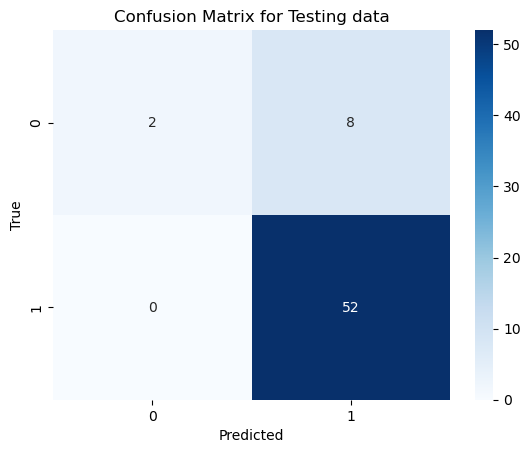

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Testing data')
plt.show()

- True Positives (TP): 52 instances were correctly predicted as having lung cancer.
- True Negatives (TN): 2 instances were correctly predicted as not having lung cancer.
- False Positives (FP): 8 instances were incorrectly predicted as having lung cancer (Type I error).
- False Negatives (FN): 0 instances were incorrectly predicted as not having lung cancer (Type II error).

#### Confusion Matrix for Validation data

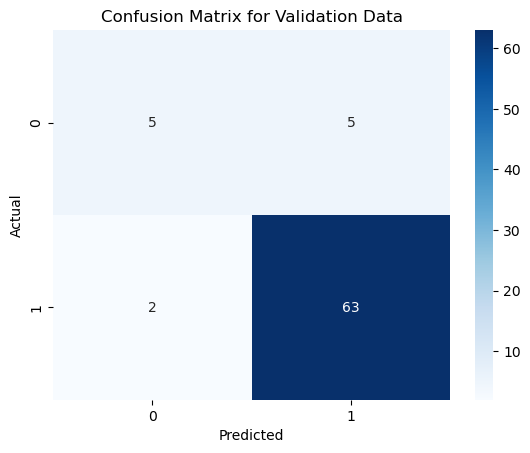

In [28]:
cm = confusion_matrix(y_val, y_val_pred)
sns.heatmap(cm, fmt = 'd', cmap = 'Blues', annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Validation Data')
plt.show()

- True Positives (TP): 63 instances were correctly predicted as having lung cancer.
- True Negatives (TN): 5 instances were correctly predicted as not having lung cancer.
- False Positives (FP): 5 instances were incorrectly predicted as having lung cancer (Type I error).
- False Negatives (FN): 2 instances were incorrectly predicted as not having lung cancer (Type II error).

As we can see here the model predicts those with Cancer more accurately than those without cancer. Our models validation set predicts slightly better compared to our testing data

### ROC Curve and AUC

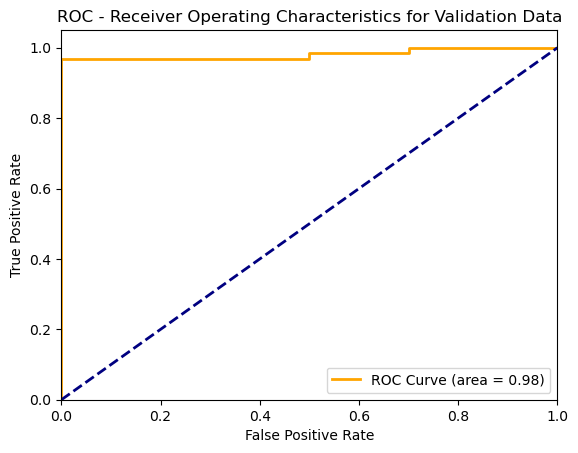

In [42]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'Orange', lw = 2, label = 'ROC Curve (area = %0.2f)'%roc_auc)
plt.plot([0,1], [0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver Operating Characteristics for Validation Data')
plt.legend(loc = 'lower right')
plt.show()

#### Observations of ROC Curve
- High Area Under the curve: The curve is very close to the top, so there is a high area under the curve. This indicated that our model us very good at discriminating between positive and negative values
- The AUC value is very close to 1, this suggests that our logistic regression model performs exceptionally well on the validation set - It can effectively distinguish between cases with and without cancer

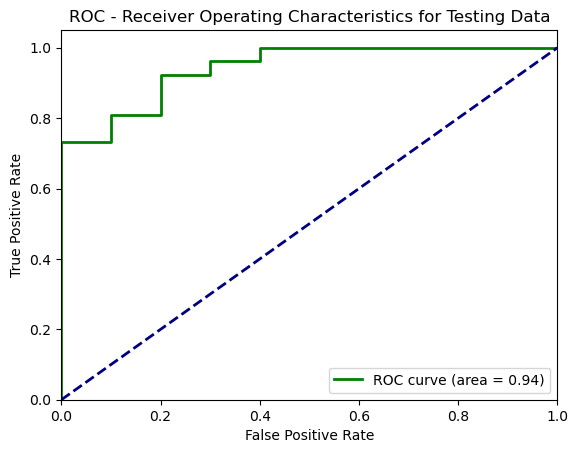

In [41]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'Green', lw = 2, label = 'ROC curve (area = %0.2f)'% roc_auc)
plt.plot([0, 1], [0,1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - Receiver Operating Characteristics for Testing Data")
plt.legend(loc = 'lower right')
plt.show()

- Similar to the ROC Curve for Validation data our model has an AUC of 0.94 is excellent, indicating that the model has a high degree of discriminative ability to distinguish between the classes (lung cancer and no lung cancer).
- The steps in the ROC curve show where the sensitivity gains occur at specific false positive rate increments. The steps are relatively large, which might suggest that certain thresholds in your model's probability outputs are critical for changing the classification decision.
- The high AUC value means the model is generally very reliable.

### Precision Recall Curve
- The Precision-Recall (PR) curve is a graph that illustrates the trade-off between precision and recall for a classifier at different threshold levels. This curve is particularly useful when evaluating binary classification systems, especially in situations where there is an imbalance between the positive and negative classes.
- The PR curve plots precision (y-axis) against recall (x-axis) for different probability thresholds.
- A higher area under the curve (AUC) indicates a better performance of the classifier. A perfect classifier would have a PR curve that reaches a point of (1,1) on the graph, meaning 100% recall and 100% precision.

Example
- In medical testing, where it might be more detrimental to miss a positive case (like a disease) than to have false alarms, the precision-recall trade-off is critical. The PR curve allows healthcare providers to determine a threshold that maximizes recall (fewer missed true cases) while maintaining acceptable precision (not too many false positives).

In [44]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

In [48]:
precision, recall, thresholds = precision_recall_curve(y_val, model.predict_proba(X_val)[:, 1])
average_val_precision = average_precision_score(y_val, y_val_pred)

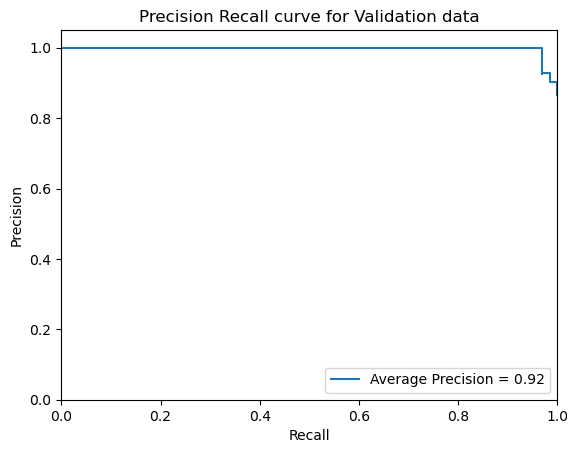

In [49]:
plt.figure()
plt.step(recall, precision, where = 'post', label = 'Average Precision = %0.2f' % average_val_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision Recall curve for Validation data')
plt.legend(loc = 'lower right')
plt.show()

- The high average precision of 0.92 is very good, our model is predicting well
- The curve starts at a precision of 1.0 and maintains high precision as recall increases, only slightly dropping off towards the end of the recall spectrum. This characteristic shows that our model can identify most of the positive cases (lung cancer cases) correctly without many false positives, until it attempts to capture nearly all the positive cases.

In [50]:
precision, recall, thresholds = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
average_test_precision = average_precision_score(y_test, y_test_pred)

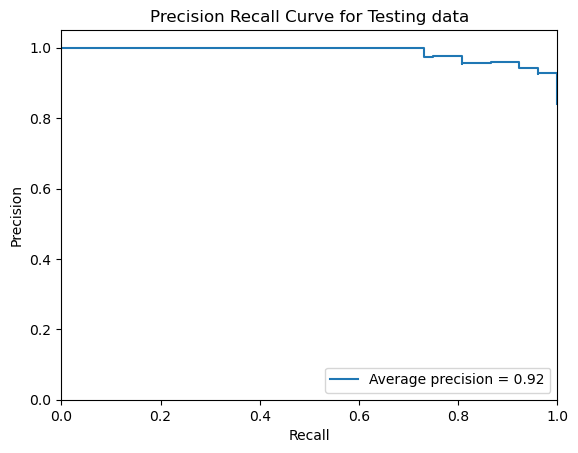

In [51]:
plt.figure()
plt.step(recall, precision, where = 'post', label = 'Average precision = %0.2f' % average_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('Precision Recall Curve for Testing data')
plt.legend(loc = 'lower right')
plt.show()

- The average precision score remains consistent at 0.92, This score indicates that the model achieves a high level of precision across various recall levels.
- The curve begins at a high precision level, maintaining it very close to 1.0 as recall increases, before experiencing minor step-like declines. This shows that the model can consistently identify true positive cases without generating many false positives
- This is good in the medical industry, we DO NOT want patients to be predicted to not have cancer but actually do.

### Feature Importance: Coefficient Plot
- In the context of logistic regression, a coefficient plot visualizes the impact or importance of a each features in a model
- This plot helps in understanding which features are most influential in predicting the target variable.
- Coefficient Plot displays the coefficients (or weights) assigned to each feature in a logistic regression model. 
- hese coefficients represent the log-odds impact of one unit increase in the feature on the probability of the outcome being true, assuming other features are held constant.
- Positive coefficients increase the log-odds of the outcome (make the event more likely), and negative coefficients decrease the log-odds of the outcome (make the event less likely).

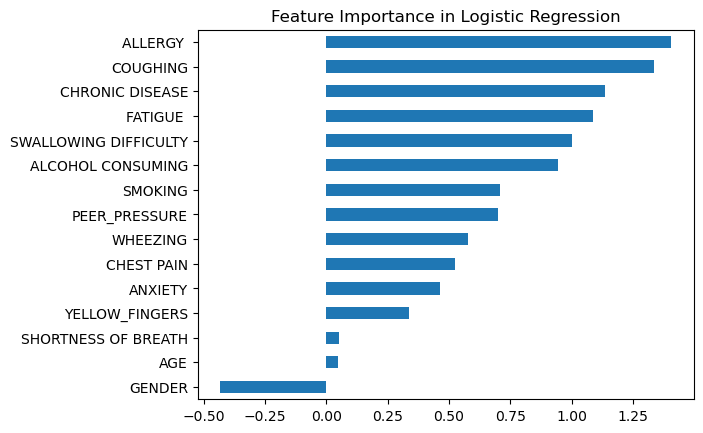

In [55]:
feature_importance = pd.Series(model.coef_[0], index = features.columns)
feature_importance.sort_values().plot(kind = 'barh')
plt.title('Feature Importance in Logistic Regression')
plt.show()

- Over here we can see the importance of features in Logistic Regression <br>
**Positive Coefficients**: 
- Allergy, Coughing, Chronic Disease, Fatigue have high postive correlation, with allergy having the largest coefficients
- Allergy is the most influential positive feature
- Swallowing Difficulty, Alcohol Consuming, Smoking, Peer Pressure, Wheezing, Chest Pain, these features also have positive coefficients with varying magnitude
- Anxiety, shortness of breath and age have small Positive Coefficients

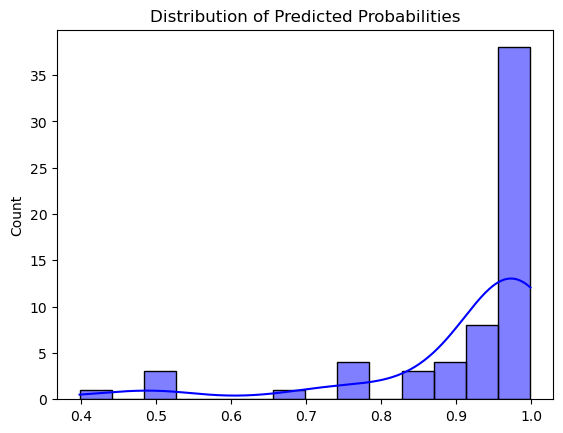

In [56]:
sns.histplot(model.predict_proba(X_test)[: , 1], kde = True, color = 'blue')
plt.title('Distribution of Predicted Probabilities')
plt.show()

-  A significant concentration of predictions are near the 1.0 mark, indicating that for a large number of instances, the model is very confident in predicting the presence of lung cancer.
